# Number Theory

Public-key algorithms, such as RSA or the Diffie-Hellman scheme that have been developed to address issues that could not be solved easily using symmetric cryptography such as the key exchange problem, are based on one-way functions from number theory, two of the most used being  

1. the factorization of large numbers (RSA)
2. the computation of discrete logarithms (Diffie-Hellman)

This notebook presents the main concepts of Number Theory and examples, developed using [Sage](http://www.sagemath.org/) and the Python programming language. Sagemath is a development environment based on Jupyter that can be downloaded from its website. 

## Prime Numbers
The set of natural numbers is N = {1,2,3,4,...}  
The set of integers is Z = {...,-2,-1,0,1,2,...}  

In [1]:
range(-5,5)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]

An integer n > 1 is a prime if the only positive divisors of n are 1 and n. If a number n is not divisible by any prime up to $\sqrt{n}$, it must be a prime for any composite number has at least two prime factors and they cannot be both greater than $\sqrt{n}$

In [2]:
prime_range(10,50)

[11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

Composites are integers that are not primes

In [81]:
[n for n in range(10,30) if not is_prime(n)]

[10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28]

#### Definition: Greatest Common Divisor
Given two integers a and b, the greatest common divisor is the integer that divides both a and b. Here follow some examples showing some facts about gcd 

In [82]:
gcd(9,12)

3

In [83]:
gcd(0,4)

4

In [84]:
gcd(9,12 - 9)

3

In [85]:
gcd(9,12 + 9)

3

In [86]:
gcd(9,12 - 5*9)

3

In [87]:
gcd(9,12 + 5*9)

3

In [88]:
gcd(9*10,12*10)

30

#### Relatively prime
Two integers a,b, are said to be relatively prime, i.e. their greatest common divisor is 1, if gcd(a,b) = 1. Being a,b relatively prime does not imply a nor b is prime.

In [11]:
gcd(14,9)

1

#### Division Algorithm

Given two integers a and b, with b != 0, there exists unique integers q, the quotient, and r, the remainder, such that $0 \le r \lt |b|$ and a = bq + r 

In [89]:
a = 2261
b = 1275
q = a//b # quotient
r = a%b  # remainder r = a - b*q 
q,r

(1, 986)

In [90]:
a == b*q + r

True

#### Algorithm: Greatest Common Division (Euclidean Algorithm)
A recursive function to compute the greatest common divisor.

In [91]:
def recgcd(a,b):
    if b > a :
        c = a
        a = b
        b = c
    r = a%b
    if r == 0 :
        return b
    else :
        return recgcd(b,r)

In [92]:
recgcd(1275,2261)

17

#### Extended Euclidean Algorithm
Let d = gcd(a,b) then 

$\exists$ x,y $\in$ Z | ax + by = d  

This follows from the fact that since d|a and d|b there must be two integers x,y for which d = ax + by. This same result shows that a linear equation of the form ax + by = d, also known as Diophantine equation, where x and y are integers, has a solution only if d is a multiple of the greatest common divisor of a and b. Sage provides a function to compute the gcd and x and y

In [93]:
def recxgcd(a,b):
    if b > a :
        c = a
        a = b
        b = c
    r = a%b
    if r == 0 :
        return b
    else :
        return recxgcd(b,r)

In [94]:
recxgcd(14,9)

1

In [95]:
xgcd(14,9)

(1, 2, -3)

#### Fundamental Theorem of Arithmetic (Euclid)
Every natural number n can be written as a product of primes  
n = $p_1^{e_1}p_2^{e_2}..p_r^{e_r}$  
where $p_1,p_2,..p_r$ are distinct primes and $e_1,e_2,..e_r$ are positive integers, and that product is unique.

In [17]:
factor(15)

3 * 5

#### Algorithm: Prime Sieve
Given a positive integer n, this algorithm computes a list of primes from 2 up to n.

In [18]:
def primeSieve(n): 
    # recursive subfunction
    def crossOff(n,odds,primes): 
        p = odds[0] 
        if p > sqrt(n):
            [primes.append(odd) for odd in odds]
        else:
            primes.append(p)
            odds = [odd for odd in odds if not odd%p == 0]
            crossOff(n,odds,primes)
        return primes
    
    primes = [2]
    odds = [j for j in range(3,n) if not j%2 == 0]
    
    return crossOff(n,odds,primes)

In [19]:
primeSieve(40)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]

The same can be computed using Sage as we have seen at the beginning.

#### Number of primes in an interval
Sage provides a quick function to compute pi(x), the number of primes from 2 up to a number x. It can also be shown that the ratio between the function pi(x) and x/log(x) is asymptotically equal to 1.

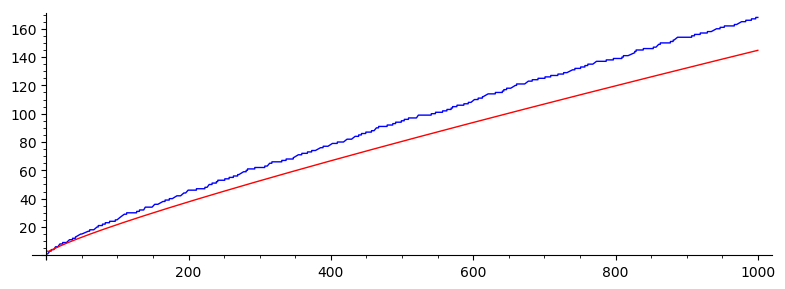

In [20]:
plot_prime = plot(prime_pi(x),2,1000,rgbcolor='blue')
plot_asympt = plot(x/(log(x)),2,1000,rgbcolor='red')
show(plot_prime + plot_asympt,xmin=0,figsize=[8,3])

The ratio pi(x)/(log(x) - 1) is asymptotically equal to 1.

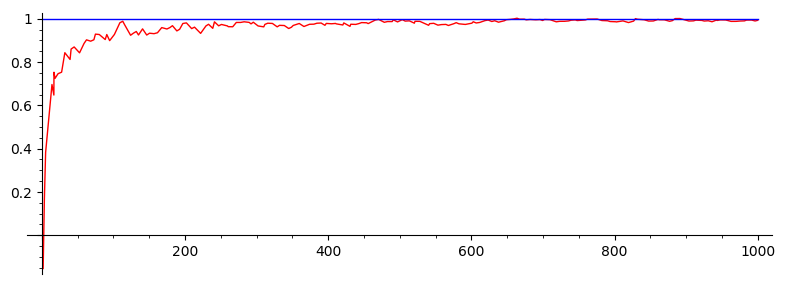

In [21]:
plot_ratio = plot(prime_pi(x)*(log(x)-1)/x,2,1000,rgbcolor='red')
plot_const = plot(1,2,1000,rgbcolor='blue')
show(plot_ratio + plot_const,xmin=0,figsize=[8,3])

## The Ring of Integers Modulo n

We build the set of integers $Z_N$ where N is the modulus. This set of equivalent classes, or residue classes modulus N, divides the integers Z in N subsets, or rings for which the arithmetic operation of addition and multiplication apply in a similar way like for the integers in Z.

In [22]:
Z11 = Integers(11) 
list(Z11)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#### Congruences
If a,b are integers and n is a natural number we say that a is congruent to b modulo n if n|a-b and write  a$\equiv$b(mod n)  
If a $\equiv$ b (mod n) then there exists an integer y such that ny= a - b or a = ny+ b.

In [23]:
[Z11(11*y + 2) for y in range(1,5)]

[2, 2, 2, 2]

The set ($Z_N$)* are all the elements x of $Z_N$ for which gcd(x,N) = 1. One important property of ($Z_N$)* is that all its elements x have an inverse $x^-1$

In [24]:
Z11_star = [x for x in Z11 if gcd(x,11) == 1]; Z11_star 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#### Linear Congruences
For example the inverse of 3 in $(Z_{11})^*$ can be computed from the linear congruence $3x \equiv$ 1 (mod 11). This equivalence can be written as a linear equation 3x = 11y + 1 and solved for y = 1 so that x = 4. We can show that $3^{-1} \equiv$ 4 (mod 11) 

In [25]:
Mod(3,11) * Mod(4,11)

1

In the same way we can find, e.g. $5^{-1}\equiv$ -2 (mod 11)

In [26]:
Mod(5,11) * Mod(9,11)

1

The inverse x of an element a of $(Z_{n})^*$ such as in $ax\equiv$ b (mod n), can be found using the extended GCD Sage function xgcd(a,n) that solves the linear equation ax = ny + b , and returns gcd(a,n), equal to 1 if b = 1, x and y  

In [96]:
xgcd(3,11) # returns gcd(3,11), the inverse of 3 in Z11

(1, 4, -1)

Sage has an even more straightforward fuction to compute inverses modulo n

In [97]:
Mod(3,11)^-1

4

#### Order of an Element of $Z_N$
There exists an exponent of x, h, for which $x^h \equiv$ 1 (mod n). The smallest exponent h, for which the relation holds, is called the **order of x to the modulus n**. Let's see two examples for x = 2 and x = 3 (mod 11)

In [98]:
p = 11
min([order for order in range(1,p) if Mod(2,p)^order == 1])

10

In [99]:
min([order for order in range(1,p) if Mod(3,p)^order == 1]) # In this case the least exponent is 5

5

We can compute the order of all the elements in $(Z_{11})^*$ 

In [100]:
p = 11
[[x,min([order for order in range(1,p) if Mod(x,p)^order == 1])] for x in range(1,p)]

[[1, 1],
 [2, 10],
 [3, 5],
 [4, 5],
 [5, 5],
 [6, 10],
 [7, 10],
 [8, 10],
 [9, 5],
 [10, 2]]

We can also use directly a function provided by Sage

In [101]:
[[x,x.multiplicative_order()] for x in Z11_star]

[[1, 1],
 [2, 10],
 [3, 5],
 [4, 5],
 [5, 5],
 [6, 10],
 [7, 10],
 [8, 10],
 [9, 5],
 [10, 2]]

We can compute $9^5\equiv$ 1 (mod 11) for example 

In [102]:
Mod(9,11)^5

1

#### Fermat's Little Theorem
Formally the theorem can be stated as follow

$\forall x \in (Z_p)^*, x^{p-1} \equiv 1$ (mod p)

In words, the equivalence holds if p is a prime and does not divide x, i.e. gcd(x,p) = 1. 

In [103]:
p = 11
powers = [x^(p-1) for x in Z11_star]; powers

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Fermat's theorem can be used to test the primality of a number and to generate a random prime. First a random number p is generated, e.g. p $\in [2^{1024},2^{1025} - 1]$, and then it is tested with the Fermat's theorem whether it is prime or not. Since 2 is the smallest prime, x is usually set to 2 so that any p > 2 cannot divide 2 and the primality test is performed with

$2^{p-1} \equiv 1$ (mod p)  

If the equivalence does not hold, it means that p is certainly not a prime. If the equivalence does hold, it means that p is likely prime. The primality of a number can be tested in Sage. 

In [8]:
import random
num_bits = 80
for i in range(200):
    p_test = random.SystemRandom().getrandbits(num_bits)
    if Mod(2,p_test)^(p_test - 1) == 1:
        print(i,p_test,is_prime(p_test))

(0, 908493472418481044279593L, True)
(16, 1163487600161080686098293L, True)
(28, 132935675951418546351193L, True)
(92, 199263155471410178718881L, True)
(97, 390977291559523256538221L, True)
(119, 325234076206207367406059L, True)
(145, 538598053970243580283991L, True)


Sage provides a function to test directly the primality of a number

In [105]:
is_prime(323)

False

The Fermat's theorem can also be used to compute the inverse since $x^{p-2}\equiv x^{-1}$ (mod p)

In [106]:
p = 11
x = Mod(3,p); x

3

In [107]:
a = Mod(3,p)^9; a

4

In [108]:
x * a

1

#### Euler's function $\phi(n)$
It is defined for any positive integer n as: $\phi(n) = |(Z_n)^*|$  In words, the Euler's function represents the number of elements in $Z_n$ that are relatively prime to n. If p is any prime number then $\phi(p)=p-1$

In [40]:
Z12 = Integers(12)
Z12_star = [x for x in Z12 if gcd(x,12) == 1]; Z12_star

[1, 5, 7, 11]

In [41]:
phi = len([x.multiplicative_order() for x in Z12_star]); phi

4

It is also available from Sage

In [123]:
euler_phi(12)

4

#### Euler's Theorem
Formally the theorem can be stated as: $\forall x \in (Z_N)^*, x^{\phi(N)} \equiv 1$ (mod N)  

In [43]:
[x^euler_phi(12) for x in Z12_star]

[1, 1, 1, 1]


Euler's theorem helps in computing the powers of congruences. For examples $7^9$ (mod 12).  
Since $\phi(12) = 4$ such that $7^4 \equiv 1$ (mod 12) then  $7^9 \equiv 7^{4+4+1} \equiv 7^47^47^1 \equiv 7^1$ (mod 12)

In [44]:
Mod(7,12)^9 == Mod(7,12)

True

As in the case of the Fermat's theorem for primes, we can compute the inverse of a congruence using Euler's theorem since 

$x^{\phi(N)-1} \equiv x^{-1}$ (mod N)

#### Modular exponentiation
How to Compute $a^m$ (mod n)  

A naive approach to computing $a^m$ (mod n) is to simply compute $a^m$ = a*a*...a, and then reduce by modulo m. This algorithm is inefficient because it requires m-1 multiplications, expecially when m has hundreds of digits. A much more efficient algorithm is the following

1. Apply the Euler's theorem to reduce the exponent
2. Compute the binary format of the remaining exponent
3. Compute the squares of a modulo n according to the binary digits
4. Compute the product of the squares of a

The number of operations needed with this algorithm depends on the number of binary digits of m instead of on m-1.

For example, let's compute $7^{91} \equiv$ (mod 100)

In [45]:
gcd(7,100) # 7 does not divide 100

1

In [46]:
euler_phi(100)

40

Since $\phi{(100)}$ = 40, then for the Euler's theorem, we can just compute $7^{91}\equiv7^{40}7^{40}7^{11}\equiv7^{11}\equiv$ (mod 100)

It's easy to transform the exponent in binary digits

In [109]:
def binary(m,s=""):
    # A recursive function to change
    # from digits to binary string
    if m == 0:
        return s 
    else:
        if m%2 == 0:
            s = "0" + s
        else:
            s = "1" + s
        return binary(m//2,s)    

In [110]:
binary(11)

'1011'

So 11 = $1*2^3$ + $0*2^2$ + $1*2^1$ + $1*2^0$. This means that we have just to compute repeatedly $7^2\equiv$49 (mod 100) then $(7^2)^2\equiv$1 (mod 100) and $((7^2)^2)^2\equiv$1 (mod 100) so that $7^{11}\equiv1*49*7 \equiv$43 (mod 100) 

Sage implements the algorithm so that the example can be computed easily

In [111]:
Mod(7,100)^91

43

#### The structure of $(Z_p)^*$

If p is prime, then $\phi(p)$ = p - 1 and $(Z_p)^*$ is cyclic group whose order is $\phi(p)$ and for which there exist an element g $\in (Z_p)^*$ whose powers from 2 up to p-2, i.e. {$g^2, g^3,...,g^{p-2}$}, will span the entire set $(Z_p)^*$

In [112]:
Z7 = Integers(7)
list(Z7)

[0, 1, 2, 3, 4, 5, 6]

$(Z_7)^*$

In [113]:
Z7_star = [x for x in Z7 if gcd(x,7) == 1]; Z7_star

[1, 2, 3, 4, 5, 6]

Let's see the set generated by raising 3 in $(Z_7)^*$ to the power of 2 up to 5. As we can see, the powers of 3 span the entire set $(Z_7)^*$. That is, 3 is a **generator** of $(Z_7)^*$.

In [114]:
p = 7
[Mod(3,p)^n for n in range(p-1) if gcd(3,p) == 1 ]  # range(a) = [0,1,..,a)

[1, 3, 2, 6, 4, 5]

3 (mod 7) in $(Z_7)^*$ is called generator or primitive root modulo 7. Sage provides a function to compute the primitive root of $(Z_p)^*$

In [115]:
primitive_root(7)

3

The order of the generator is equal to $\phi(p)$ 

In [116]:
p = 7
generator = 3
g = Mod(generator,p)
g.multiplicative_order() 

6

In [117]:
[x^euler_phi(7) for x in Z7_star]

[1, 1, 1, 1, 1, 1]

As an additional example, we can compute the order of all the elements in $(Z_{11})^*$

In [118]:
p = 11 # a prime number
Zp = Integers(p)
Zp_star = [x for x in Zp if gcd(x,p) == 1]
element_order_list = [[x,min([order for order in range(1,p) if Mod(x,p)^order == 1])] for x in Zp_star]; element_order_list

[[1, 1],
 [2, 10],
 [3, 5],
 [4, 5],
 [5, 5],
 [6, 10],
 [7, 10],
 [8, 10],
 [9, 5],
 [10, 2]]

In [119]:
orders = sorted(Set([element_order_list[x][1] for x in range(0,p-1)])); orders

[1, 2, 5, 10]

#### Subgroups of $(Z_p)^*$
The group $(Z_p)^*$ can be divided by subgroups according to the order of its elements

In [58]:
elements_by_order = [[order,sorted([x[0] for x in element_order_list if x[1] == order])] for order in orders]; elements_by_order

[[1, [1]], [2, [10]], [5, [3, 4, 5, 9]], [10, [2, 6, 7, 8]]]

We compute the cardinality $\phi(11)$ = $|(Z_{11})^*|$

In [59]:
G = len(Zp_star); G

10

In [60]:
elements_highest_order = [x[1] for x in elements_by_order if x[0] == G][0]; elements_highest_order

[2, 6, 7, 8]

All the elements of $(Z_{11})^*$ whose order is equal to |$(Z_{11})^*$| are primitive and can generate all the other elements as shown below

In [61]:
[sorted([Mod(x,p)^n for n in range(1,p) if gcd(x,p) == 1 ]) for x in elements_highest_order] 

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

The number of generators in $(Z_p)^*$ can be computed by $\phi(|(Z_p)^*|) = \phi(p-1)$

In [62]:
euler_phi(G)

4

Elements whose order is different from |$(Z_{11})^*$| cannot generate all the elements

In [144]:
sorted(Set([Mod(3,p)^n for n in range(1,p) if gcd(6,p) == 1 ]))

[1, 3, 4, 5, 9]

As we can see the orders of each element of $(Z_{11})^*$ divide $|(Z_{11})^*|$. More in general, $\forall$ x $\in (Z_p)^*$, ord(x) | |$(Z_p)^*$|. It can also be shown that if |$(Z_p)^*$| is prime, then all elements in $(Z_p)^*$, but 1 (mod p), are prime.

#### e'th roots modulo n
Let's say we want to compute the 3rd root of 7 in $Z_{11}$, $7^{1/3}$ (mod 11). One, very inefficient, way is to find a number x in $Z_{11}$ such that $x^3\equiv$ 7 (mod 11)

In [132]:
p = 11
[x for x in range(p) if Mod(x,p)^3 == 7]

[6]

so we can write $6\equiv 7^{1/3}$ (mod 11). The e'th roots don't always exist. For example $2^{1/2}$ (mod 11) does not exists. So we have to figure out when the e'th root of a number c in $Z_p$ exists and how to compute $c^{1/e}$ (mod p) efficiently. 

##### The easy case
Let's start with the easy case, that is when $e$ is relatively prime to $p-1$, i.e.   

gcd(e,p-1) = 1

In this case $c^{1/e}$ always exists for all $c\in(Z_p)^*$, and there is an algorithm to compute $c^{1/e}$ in $Z_p$. Since $e$ is relatively prime to $p-1$, $e$ has an inverse

$d\equiv e^{-1}$ in $Z_{p-1}$

such that $de\equiv$ 1 (mod p-1) and we can write 

$c^{1/e}\equiv c^d$ (mod p). 

For example if we want to compute $2^{11}$ (mod 19), where $c=2$ and $e=11$, we first compute $d = 11^{-1}$ (mod 18). From Euler's theorem we know that $11^{-1} \equiv 11^{\phi(18)-1} \equiv 11^5$ (mod 18)

In [127]:
d = Mod(11,18)^5; d

5

In [129]:
root_11th = Mod(2,19)^5; root_11th 

13

so that $2^{1/11} \equiv$ 13 (mod 19)

We can prove the equation rewriting expression $de\equiv$ 1 (mod p-1) as $de = k(p-1) + 1$, where $k$ is an integer. Now, if we raise the above expression to the power of $e$ we get

$c \equiv (c^d)^e \equiv c^{de} \equiv c^{k(p-1)+1} \equiv c^{k(p-1)}c \equiv (c^{p-1})^k c \equiv c$

since $\forall c \in Z_p, c^{p-1}\equiv$ 1 (mod p), we have proven that the relation holds.

##### The less easy case
It's when $e$ is not relatively prime to $p-1$, i.e. 

$gcd(e,p-1)\neq 1$

The canonical example here is when e = 2. If p is an odd prime (the only even prime is 2) $p-1$ is going to be even and since 2 divides $p-1$ we have $gcd(2,p-1)\neq 1$. So the algorithm we used for computing e'th roots does not work for square roots modulo an odd prime.

#### Quadratic residues 

The square root of $x \in Z_p$ is a number $y \in Z_p$ such that $y^2 \equiv x$ (mod p). An element $x \in (Z_p)^*$ is called a quadratic residue if it has a square root in $Z_p$.

In [168]:
p = 11
Zp = Integers(p)
Zp_star = [x for x in Zp if gcd(x,p) == 1];
QR = list(set([x^2 for x in Zp_star])); QR # QR = Quadratic Residue

[1, 3, 4, 5, 9]

Since the squaring function $x -> x^2$ is a 2-to-one map, there can be only $\frac{p-1}{2}$ quadratic residues in $(Z_p)^*$ and $\frac{p-1}{2}+1$ in $Z_p$, as we have to add $0$. This means that when $e=2$ and $p-1$ is even, only half of the elements in $(Z_p)^*$ have a (square) root.

#### Euler's Criterion
An element a $\in (Z_p)^*$ is a quadratic residue, hence has a square root, if and only if $a^{(p-1)/2}\equiv$ 1 (mod p)

In [166]:
p = 11
QR = [a for a in range(1,p) if gcd(a,p) == 1 and Mod(a,p)^((p-1)//2) == 1]; QR

[1, 3, 4, 5, 9]

It is important to note that Euler's criterion can't be used to compute the square root of a number modulus p, it just tells which elements in $(Z_p)^*$ have a square root. Sage provides a function to compute the square root of a quadratic residue.

In [167]:
a = Mod(5,11)
a.sqrt()

4

The elements in $Z_p$ that are not quadratic residues are called quadratic nonresidue. The two types of elements can be differentiated using the **Legendre Symbols**

+ 1 for the quadratic residues
+ -1 for the quadratic nonresidues  

For example, 1 and 4 are quadratic residues in $(Z_5)^*$ while 2 and 3 are quadratic nonresidues.

In [164]:
p = 5
[[x,legendre_symbol(Mod(x,p),p)] for x in range(1,p) if gcd(x,p) == 1]

[[1, 1], [2, -1], [3, -1], [4, 1]]

#### Quadratic equations in $Z_p$
Quadratic equations of the form $ax^2+bx+c\equiv$ 0 (mod n) can be solved using the well known formula

$x = \frac{-b  +/-  \sqrt{b^2-4ac}}{2a}$

by computing $(2a)^{-1}$, using the extend Euclidean Algorithm and $\sqrt{b^2-4ac}$, using a square root algorithm.

## Hard problems

#### Discrete Logarithms 
The problem is, given a large prime number p and two elements a,b $\in (Z_p)^*$, to find out the value of an integer 1 $\le x \le p-1$ such that $a^x\equiv$ b (mod p). In other words, the problem is to compute $x\equiv log_a b$ (mod p) 

In [71]:
p = 97 # p prime number 
g = primitive_root(p); g # generator, with 1 < g < p

5

In [72]:
a = Mod(g,p)
x = randint(1,p)
b = a^x
print(a,x,b)

(5, 18, 27)


A naive solution to the problem of finding the discrete logarithm is to simply try different values of the exponent till it matches $a^x$(mod p).

In [73]:
x_match = [x_test for x_test in range(p) if Mod(g,p)^x_test == b ][0]; x_match

18

In [74]:
x_match == x

True

The problem with the naive approach is that it becomes infeasible for modulus p with hundreds of digits.

#### Diffie-Hellman protocol
Here we implement the Diffie-Hellman protocol in which the eavesdropper would have to compute the discrete logarithm of a large number in order to find out the secret key shared by Alice and Bob to encrypt their messages.

In [2]:
p = random_prime(10^6,10^9) # Alice chooses a big prime number p and a generator g and send them to Bob over a public insecure network 
g = primitive_root(p) # generator, with 1 < g < p
print(p,g)

(695323, 5)


In [3]:
n = randint(1,p) # Alice' secret key, a random number chosen uniformly from the set of integers {1,2,...,p-1}
m = randint(1,p) # Bob's secret key, a random number chosen uniformly from the set of integers {1,2,...,p-1}
g_exp_n = Mod(g,p)^n # Alice sends this number to Bob over a public network
g_exp_m = Mod(g,p)^m # Bob sends this number to Alice over a public network
print(n,m,g_exp_n,g_exp_m)

(22944, 379828, 578668, 14794)


In [4]:
sm = g_exp_n^m # shared secret key computed by Bob
sn = g_exp_m^n # shared secret key computed by Alice
sm == sn # Alice and Bob share the same key  Mod(g,p)^(n*m), that supposedly no one else knows, to encrypt their messages

True

An eavesdropper, that wants to find out the secret key shared by Alice and Bob, has to extract n from $g^n$(mod p) or m from $g^m$(mod p) by computing, e.g. $log_g(g^n)$(mod p).

In [5]:
n_match = [n_test for n_test in range(p) if Mod(g,p)^n_test == g_exp_n ][0]; n_match

22944

In [79]:
broken_secret_key = g_exp_m^n_match
broken_secret_key == sn

True

#### RSA
A public-key encryption system is a triple of algorithms:
+ a random key generator algorithm to generate a key pair, a public key and a secret key. 
+ an encryption algorithm that takes as input a public key and a message and produces a ciphertext
+ a decryption algorithm that takes as input the corresponding secret key and a ciphertext and produces the corresponding message

The general idea is to define a trapdoor one-way function that has some useful properties. One property is that it must be easy to compute its value given an input, but very difficult to find the inverse without a secret parameter. One kind of such functions can be defined by exponentiation. If x is a message we can encrypt it c = $x^e$ and then decrypt the ciphertext x = $c^d$ = $(x^e)^d$ = $x^{ed}$. The decryption works if the exponent d is the inverse of e such that $x^{ed}$ = x. It can be shown that 

$x^{ed}\equiv$ x (mod n)  

where n is the product of two primes, p and q, and 

ed $\equiv$1 (mod $\phi(n)$) 

where $\phi(n)$ = (p-1)(q-1)

The generator algorithm takes as input an integer l > 2, then generates two random l-bit primes, p and q, that must be both relatively prime to an odd integer e, that will be used as exponent in the encryption algorithm, so that 

gcd(e,p-1) = 1 and gcd(e,q-1) = 1

The exponent e can take a constant value, common values are e = 3 or e = 65337. The two primes p,q are used to compute the modulus 

n = pq

and the exponent $d$ can be computed as the inverse of $e$

d $\equiv e^{-1}$ (mod$\phi(n)$)

In RSA the public key pk is represented by the pair (e,n) and the private key sk by the pair (d,n). Given a message x and a public key pk = (e,n), the RSA encryption function is defines as 

E(pk,x): $x^e$ (mod n)

Given the corresponding private key pk = (d,n), the decryption function is defined as

D(sk,y): $y^d$ (mod n)

The implementation used in the following examples is known as "__textbook RSA__" or "schoolbook RSA"  and it's insecure. It should never be used in production and is shown here only as a simple way to understand the basics of RSA.

##### Key generator algorithm

In [146]:
def G(num_bits):
    p = next_prime(random.SystemRandom().getrandbits(num_bits))
    q = next_prime(random.SystemRandom().getrandbits(num_bits))
    n = p*q
    phi_n = (p-1)*(q-1)
    e = 65537
    d = Mod(e,phi_n)^-1 if gcd(e,phi_n) == 1 else 0 # we can also use Euler's theorem d = Mod(e,n)^(phi_n - 1)
    return e,d,n

In [147]:
e,d,n = G(49)
print(e,d,n)

(65537, 28971570680574080672109390833, 45022996957526543552624252969)


##### Encryption algorithm

In [124]:
def E(e,n,msg):
    return Mod(msg,n)^e

##### Decryption algorithm

In [125]:
def D(d,n,c):
    return Mod(c,n)^d

For consistency it must be: 

D(sk,E(pk,m)) = m 

where pk = (e,n) and sk = (d,n)

In [126]:
msg = 123
D(d,n,E(e,n,msg)) == msg 

True

To see a more interesting example, using a string of characters as a message, we have to encode the string as a number, encrypt the number using the RSA encryption function, then decrypt the ciphertext using the decryption function and finally decode the output. The message length in bits must be less than twice the number of bits used as input of the generator function. For example if num_bits = 80 in G(num_bits), then 8*len(msg) < 160 

In [127]:
def encode(s):
    # encodes a string as a number
    s = str(s)
    return sum(ord(s[i])*256^i for i in range(len(s)))

def decode(n):
    # decodes a number into a string
    n = Integer(n)
    v = []
    while n != 0:
        v.append(chr(n % 256))
        n //= 256
    return ''.join(v)

In [140]:
msg = "hello crypto"
e_msg = encode(msg) # encode the message as a number
print(8*len(msg), e_msg)

(96, 34493602630589181337786934632)


In [141]:
c = E(e,n,e_msg); c # encrypts the message

202311449149566917505671179425

In [142]:
d_msg = D(d,n,c); d_msg

34493602630589181337786934632

In [143]:
decode(d_msg)

'hello crypto'

##### Attacks on RSA
The only known attack is by factorizing the modulus n. Factorizing a big number is known to be a hard problem. The last record, achieved in 2009, has been the factorization of a 768 bits number. The numbers used in practice are much bigger than those used in the examples, usually in the range [1024 - 2048] bits, if not bigger. 

## References
+ [Stein, Elementary Number Theory](https://wstein.org/books/ent/)